<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(TrainH20_TestGE19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quelle: https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
import csv
data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
pd.set_option('display.max_colwidth',150)
data.head(10)

,tweet_id,text,task1,task2,ID
0,1133388798925189122,Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd,NOT,NONE,hasoc_2020_de_2684
1,1127134592517980161,RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…,NOT,NONE,hasoc_2020_de_1042
2,1128897106171842560,"@ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen",NOT,NONE,hasoc_2020_de_774
3,1123576753199484928,"@Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles",NOT,NONE,hasoc_2020_de_559
4,1128743783393312768,RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken,HOF,PRFN,hasoc_2020_de_1969
5,1134139256375525376,ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN,HOF,PRFN,hasoc_2020_de_2926
6,1132759271618293761,RT @Schrammi44: Er ist einfach der GOAT @Bouncaay https://t.co/bb9b5SWaKi,NOT,NONE,hasoc_2020_de_2994
7,1131107693123526657,KFM Deutsche Mittelstand AG: Deutscher Mittelstandsanleihen FONDS zeichnet neue Hörmann-Anleihe mit Mindest-Kupon 4… https://t.co/5HeRedf9cx,NOT,NONE,hasoc_2020_de_1574
8,1133093570229997573,"@mentalshards_ ich will jetzt nicht offenden oder so, ich will einfach nur, das die scheiße weniger wird",HOF,PRFN,hasoc_2020_de_1480
9,1126898700683501569,RT @SteinbachErika: Einfach skandalös! https://t.co/dC5NXFbviQ,NOT,NONE,hasoc_2020_de_3224


In [ ]:
data.shape

(2373, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0    NOT
1    NOT
2    NOT
3    NOT
4    HOF
Name: task1, dtype: object

# Checking Dataset Balancing


NOT    1700
HOF     673
Name: task1, dtype: int64


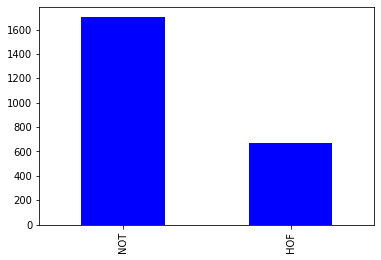

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["HOF","NOT"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 0 0 1 1 0 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                 Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…
2                                                             @ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen
3      @Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                         RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                       RT @Schrammi44: Er ist einfach der GOAT @Bouncaay ht

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                    Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstuetzung fuer den europaeischen Kl…
2                                                               @ruhrbahn jeden Morgen eine neue „Fahrzeugstoerung“, ihr seid einfach nur zum Kotzen
3        @Junge_Freiheit Die Inkas hatten sich schon daemlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                            RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                   ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                          RT @Schrammi44: Er ist einfach 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                          deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: die deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen ihrer fehlenden unterstuetzung fuer den europaeischen kl 
2                                                               ruhrbahn jeden morgen eine neue  fahrzeugstoerung , ihr seid einfach nur zum kotzen
3        junge freiheit die inkas hatten sich schon daemlich angestellt, bei den spanischen eindringlingen, aber der deutsche toppt dann doch alles
4                               technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen vater in arsch ficken
5                                                                                         ich habe mir gerade diese dorne aus meinem arsch gezogen 
6                                                                                                    schrammi44:

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                            deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                        ruhrbahn morgen neue  fahrzeugstoerung , seid einfach kotzen
3                                           junge freiheit inkas schon daemlich angestellt, spanischen eindringlingen, deutsche toppt
4                                            technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
5                                                                                                         gerade dorne arsch gezogen 
6                                                                                                 schrammi44: einfach goat  bouncaay 
7                  kfm deutsche mittelstand ag: deutscher mitt

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                            deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                        ruhrbahn morgen neue  fahrzeugstoerung , seid einfach kotzen
3                                           junge freiheit inkas schon daemlich angestellt, spanischen eindringlingen, deutsche toppt
4                                            technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

8866


In [ ]:


l = tok_all.word_index
print(l)



{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'schon': 5, 'fuer': 6, 'gt': 7, 'mal': 8, 'gruenen': 9, 'scheiss': 10, 'nazis': 11, 'dumm': 12, 'frauen': 13, 'halt': 14, 'ab': 15, 'porno': 16, 'welt': 17, 'linken': 18, 'mehr': 19, 'tagesschau': 20, 'hurensohn': 21, 'ja': 22, 'zurueck': 23, 'echt': 24, 'gibt': 25, 'gratis': 26, 'gruene': 27, 'scheisse': 28, 'islam': 29, 'deutschland': 30, 'immer': 31, 'e': 32, 'frau': 33, 'politiker': 34, 'hoe': 35, 'linke': 36, 'pack': 37, 's': 38, 'warum': 39, 'kopf': 40, 'erst': 41, 'eigentlich': 42, 'leute': 43, 'fresse': 44, 'stimmt': 45, 'ueber': 46, 'idioten': 47, '2': 48, 'dumme': 49, 'n': 50, 'afd': 51, 'zdfheute': 52, 'macht': 53, 'waere': 54, 'en': 55, '1': 56, 'd': 57, 'kinder': 58, 'kotzen': 59, 'europa': 60, 'nazi': 61, 'nicht': 62, 'moechte': 63, 'deutschen': 64, 'deutsch': 65, 'lassen': 66, 'politik': 67, 'pa': 68, 'i': 69, 'wuerde': 70, 'ma': 71, 'raus': 72, 'koennte': 73, 'ist': 74, 'zeit': 75, 'geld': 76, 'schulz': 77, 'merkels

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
[2, 2054, 16, 352, 2, 13, 16, 2, 2055, 88, 16, 65, 2056]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
import csv
data_t = pd.read_csv("/content/germeval2019GoldLabelsSubtask1_2.txt", sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data_t.head(10)

data_t['task1'] = data_t['task1'].str.replace('OTHER', 'NOT')
data_t
data_t['task1'] = data_t['task1'].str.replace('OFFENSE', 'HOF')
data_t


,text,task1,task2
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,HOF,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",HOF,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",NOT,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...",HOF,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...",HOF,ABUSE
...,...,...,...
3026,Es fand aber nie eine Emanzipierungs-Phase der Zivil-Bevölkerung statt (wahrscheinlich weil das Militär jeder Abweichung im Wege stand). Gesellsch...,NOT,OTHER
3027,Um es klar zu stellen: Ich will hier kein White-Washing betreiben (hätte er die Unterstützung der Kurden gegen die Entente-Mächte wie versprochen ...,NOT,OTHER
3028,"Und dann habe ich da noch die McArthur-Briefe im Sinn. Alles in allem ist mein Eindruck der, dass er damals moderner war als heutige Kemalisten.",NOT,OTHER
3029,al sehen wer der Ersatzmann wird. Hier könnte man ggf. die aktuelle Richtung des VS korrigieren. Erfahrungsbedingt habe ich da etliche Zweifel.,NOT,OTHER


In [ ]:
data_t.shape

(3031, 3)

In [ ]:
print(data_t.dtypes)

text     object
task1    object
task2    object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    HOF
1    HOF
2    NOT
3    HOF
4    HOF
Name: task1, dtype: object

NOT    2061
HOF     970
Name: task1, dtype: int64


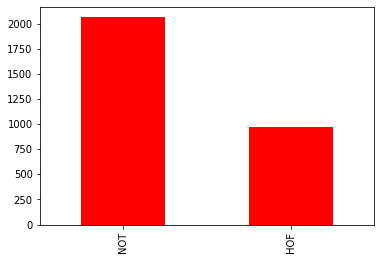

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["HOF","NOT"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[0 0 1 0 0 1 1 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                      @JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...
1                  @faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...
2                                                               @DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...
3    @welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...
4    @hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...
5    @aktuelle_stunde Also beim Fall Birmingham, England war definitiv weniger Empörung, weniger Berichterstattung, wenn man ehrlich mit sich ist gab e...
6                                             @StZ_NEWS Aber bei läppi

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                     janzimmhhb  mopo komisch das die realitaetsverweigerung immer von linken erbaermlichen correctiv accounts ausgeht...
1                faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, und dies ueberall...
2                                                             dlfnachrichten die gesichter, namen, religion der taeter wuerde zur aufklaerung beitragen...
3     welt wie verwir  muss man sein um sich zu weigern die tatsachen anzuerkennen, das dieser hass von ferkel impo ie  wurde....was bezweckt man damit...
4     hacker 1991  torben braga weil die afd den ferkelfunk abschaffen will, deshalb haben die linken zecken, schmarotzer angst fuer ihr kacken arbeite...
5     aktuelle stunde also beim fall birmingham, england war definitiv weniger empoerung, weniger berichterstattung, wenn man ehrlich mit sich ist gab ...
6                                           stz news aber bei laeppisc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



14335


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'u': 1, 'lbr': 2, 'fuer': 3, 'ja': 4, 'mehr': 5, 'spd': 6, 'mal': 7, 'e': 8, 'schon': 9, 'immer': 10, 'ist': 11, 'fcsp': 12, 'de': 13, 'ueber': 14, 'gibt': 15, 'ha': 16, 'heute': 17, 'watch': 18, 'mena': 19, 'jungnaiv': 20, 'tilojung': 21, 'sdgmasterglass': 22, 'ilona': 23, 'gr': 24, 'czsystuvx': 25, 'netzengel': 26, 'palactnet': 27, 'cdu': 28, 'deutschland': 29, 'vonbeutelratte': 30, 'wer': 31, 'nicht': 32, 'z': 33, 'einfach': 34, '0001f3fb': 35, 'menschen': 36, 'koennen': 37, 'geht': 38, 'iv': 39, 's': 40, '0001f923': 41, 'warum': 42, 'en': 43, 'ba': 44, '0001f602': 45, 'wuerde': 46, 'albe': 47, 'enst1': 48, '2': 49, 'bschuller': 50, 'berlinpapers': 51, 'merkel': 52, 'a': 53, 'waere': 54, '0001f914': 55, 'welt': 56, 'kommt': 57, '0001f44d': 58, 'macht': 59, 'afd': 60, 'gut': 61, 've': 62, 'werden': 63, 'wird': 64, 'toll': 65, 'leben': 66, 'muessen': 67, 'ganz': 68, 'gruenen': 69, 'hat': 70, 'pa': 71, 'genau': 72, 'sein': 73, 'deutsche': 74, '0001f621': 75, 'haben': 76, 'deutschen': 

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
[750, 31, 18]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          2660100   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_GERMEVAL2018_Task_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
73/75 [============================>.] - ETA: 0s - loss: 0.6651 - accuracy: 0.7085

75/75 [==============================] - 13s 7ms/step - loss: 0.6650 - accuracy: 0.7075 - lr: 3.0000e-05
Epoch 2/200
67/75 [=========================>....] - ETA: 0s - loss: 0.6014 - accuracy: 0.7155

75/75 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 3/200
66/75 [=========================>....] - ETA: 0s - loss: 0.5933 - accuracy: 0.7154

75/75 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 4/200
69/75 [==========================>...] - ETA: 0s - loss: 0.5877 - accuracy: 0.7151

75/75 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 5/200
74/75 [============================>.] - ETA: 0s - loss: 0.5826 - accuracy: 0.7171

75/75 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 6/200
68/75 [==========================>...] - ETA: 0s - loss: 0.5750 - accuracy: 0.7210

75/75 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 7/200
67/75 [=========================>....] - ETA: 0s - loss: 0.5671 - accuracy: 0.7220

75/75 [==============================] - 0s 6ms/step - loss: 0.5713 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 8/200
74/75 [============================>.] - ETA: 0s - loss: 0.5619 - accuracy: 0.7171

75/75 [==============================] - 0s 6ms/step - loss: 0.5627 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 9/200
70/75 [===========================>..] - ETA: 0s - loss: 0.5529 - accuracy: 0.7134

75/75 [==============================] - 0s 5ms/step - loss: 0.5495 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 10/200
70/75 [===========================>..] - ETA: 0s - loss: 0.5364 - accuracy: 0.7170

75/75 [==============================] - 0s 6ms/step - loss: 0.5355 - accuracy: 0.7172 - lr: 3.0000e-05
Epoch 11/200
69/75 [==========================>...] - ETA: 0s - loss: 0.5181 - accuracy: 0.7292

75/75 [==============================] - 0s 6ms/step - loss: 0.5150 - accuracy: 0.7337 - lr: 3.0000e-05
Epoch 12/200
69/75 [==========================>...] - ETA: 0s - loss: 0.4902 - accuracy: 0.7477

75/75 [==============================] - 0s 6ms/step - loss: 0.4907 - accuracy: 0.7476 - lr: 3.0000e-05
Epoch 13/200
69/75 [==========================>...] - ETA: 0s - loss: 0.4646 - accuracy: 0.7781

75/75 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.7796 - lr: 3.0000e-05
Epoch 14/200
69/75 [==========================>...] - ETA: 0s - loss: 0.4305 - accuracy: 0.8039

75/75 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.8062 - lr: 3.0000e-05
Epoch 15/200
67/75 [=========================>....] - ETA: 0s - loss: 0.3960 - accuracy: 0.8279

75/75 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.8314 - lr: 3.0000e-05
Epoch 16/200
70/75 [===========================>..] - ETA: 0s - loss: 0.3642 - accuracy: 0.8562

75/75 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.8571 - lr: 3.0000e-05
Epoch 17/200
71/75 [===========================>..] - ETA: 0s - loss: 0.3345 - accuracy: 0.8666

75/75 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8677 - lr: 3.0000e-05
Epoch 18/200
72/75 [===========================>..] - ETA: 0s - loss: 0.3041 - accuracy: 0.8872

75/75 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.8879 - lr: 3.0000e-05
Epoch 19/200
68/75 [==========================>...] - ETA: 0s - loss: 0.2764 - accuracy: 0.8998

75/75 [==============================] - 0s 6ms/step - loss: 0.2761 - accuracy: 0.9005 - lr: 3.0000e-05
Epoch 20/200
68/75 [==========================>...] - ETA: 0s - loss: 0.2526 - accuracy: 0.9090

75/75 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.9102 - lr: 3.0000e-05
Epoch 21/200
70/75 [===========================>..] - ETA: 0s - loss: 0.2279 - accuracy: 0.9228

75/75 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9220 - lr: 3.0000e-05
Epoch 22/200
66/75 [=========================>....] - ETA: 0s - loss: 0.2076 - accuracy: 0.9328

75/75 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.9317 - lr: 3.0000e-05
Epoch 23/200
68/75 [==========================>...] - ETA: 0s - loss: 0.1868 - accuracy: 0.9370

75/75 [==============================] - 0s 6ms/step - loss: 0.1872 - accuracy: 0.9368 - lr: 3.0000e-05
Epoch 24/200
75/75 [==============================] - ETA: 0s - loss: 0.1696 - accuracy: 0.9452

75/75 [==============================] - 0s 6ms/step - loss: 0.1696 - accuracy: 0.9452 - lr: 3.0000e-05
Epoch 25/200
74/75 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9523

75/75 [==============================] - 0s 6ms/step - loss: 0.1514 - accuracy: 0.9524 - lr: 3.0000e-05
Epoch 26/200
69/75 [==========================>...] - ETA: 0s - loss: 0.1403 - accuracy: 0.9615

75/75 [==============================] - 0s 6ms/step - loss: 0.1388 - accuracy: 0.9621 - lr: 3.0000e-05
Epoch 27/200
67/75 [=========================>....] - ETA: 0s - loss: 0.1284 - accuracy: 0.9650

75/75 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9650 - lr: 3.0000e-05
Epoch 28/200
70/75 [===========================>..] - ETA: 0s - loss: 0.1180 - accuracy: 0.9665

75/75 [==============================] - 0s 6ms/step - loss: 0.1167 - accuracy: 0.9676 - lr: 3.0000e-05
Epoch 29/200
69/75 [==========================>...] - ETA: 0s - loss: 0.1043 - accuracy: 0.9697

75/75 [==============================] - 0s 6ms/step - loss: 0.1056 - accuracy: 0.9692 - lr: 3.0000e-05
Epoch 30/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0941 - accuracy: 0.9798

75/75 [==============================] - 0s 6ms/step - loss: 0.0958 - accuracy: 0.9794 - lr: 3.0000e-05
Epoch 31/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0900 - accuracy: 0.9778

75/75 [==============================] - 0s 6ms/step - loss: 0.0885 - accuracy: 0.9777 - lr: 3.0000e-05
Epoch 32/200
75/75 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9810

75/75 [==============================] - 0s 6ms/step - loss: 0.0797 - accuracy: 0.9810 - lr: 3.0000e-05
Epoch 33/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0719 - accuracy: 0.9837

75/75 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9823 - lr: 3.0000e-05
Epoch 34/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0674 - accuracy: 0.9841

75/75 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9831 - lr: 3.0000e-05
Epoch 35/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0584 - accuracy: 0.9858

75/75 [==============================] - 0s 6ms/step - loss: 0.0596 - accuracy: 0.9861 - lr: 3.0000e-05
Epoch 36/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0579 - accuracy: 0.9882

75/75 [==============================] - 0s 6ms/step - loss: 0.0577 - accuracy: 0.9882 - lr: 3.0000e-05
Epoch 37/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0510 - accuracy: 0.9911

75/75 [==============================] - 0s 6ms/step - loss: 0.0509 - accuracy: 0.9907 - lr: 3.0000e-05
Epoch 38/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0510 - accuracy: 0.9873

75/75 [==============================] - 0s 6ms/step - loss: 0.0500 - accuracy: 0.9878 - lr: 3.0000e-05
Epoch 39/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0468 - accuracy: 0.9901

75/75 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9907 - lr: 3.0000e-05
Epoch 40/200
75/75 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9895

75/75 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9895 - lr: 3.0000e-05
Epoch 41/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0413 - accuracy: 0.9914

75/75 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9920 - lr: 3.0000e-05
Epoch 42/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0333 - accuracy: 0.9937

75/75 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.9937 - lr: 3.0000e-05
Epoch 43/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0317 - accuracy: 0.9944

75/75 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9941 - lr: 3.0000e-05
Epoch 44/200
75/75 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9937

75/75 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9937 - lr: 3.0000e-05
Epoch 45/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9955

75/75 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 0.9958 - lr: 3.0000e-05
Epoch 46/200
75/75 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9954

75/75 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9954 - lr: 3.0000e-05
Epoch 47/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0254 - accuracy: 0.9974

75/75 [==============================] - 1s 9ms/step - loss: 0.0255 - accuracy: 0.9971 - lr: 3.0000e-05
Epoch 48/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0242 - accuracy: 0.9969

75/75 [==============================] - 1s 8ms/step - loss: 0.0234 - accuracy: 0.9971 - lr: 3.0000e-05
Epoch 49/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9952

75/75 [==============================] - 1s 8ms/step - loss: 0.0232 - accuracy: 0.9954 - lr: 3.0000e-05
Epoch 50/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0193 - accuracy: 0.9970

75/75 [==============================] - 1s 8ms/step - loss: 0.0196 - accuracy: 0.9971 - lr: 3.0000e-05
Epoch 51/200
75/75 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9983

75/75 [==============================] - 1s 8ms/step - loss: 0.0181 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 52/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0177 - accuracy: 0.9978

75/75 [==============================] - 1s 8ms/step - loss: 0.0174 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 53/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9977

75/75 [==============================] - 1s 8ms/step - loss: 0.0151 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 54/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0153 - accuracy: 0.9973

75/75 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 55/200
75/75 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9975

75/75 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 56/200
73/75 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9979

75/75 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 57/200
74/75 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 58/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0119 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 59/200
74/75 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 60/200
75/75 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9983

75/75 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 61/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0093 - accuracy: 0.9977

75/75 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 62/200
75/75 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9983

75/75 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 63/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0085 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 64/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0081 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 65/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0069 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 66/200
73/75 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9983

75/75 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 67/200
73/75 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 68/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0062 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 69/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 70/200
75/75 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9983

75/75 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 71/200
75/75 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 72/200
75/75 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 73/200
74/75 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 74/200
73/75 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 75/200
75/75 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 76/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0048 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 77/200
73/75 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 78/200
75/75 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 79/200
75/75 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 80/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0047 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 81/200
74/75 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 82/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0034 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 83/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 84/200
73/75 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 85/200
74/75 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 86/200
73/75 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 87/200
75/75 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9983

75/75 [==============================] - 1s 7ms/step - loss: 0.0041 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 88/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0039 - accuracy: 0.9991

75/75 [==============================] - 1s 8ms/step - loss: 0.0038 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 89/200
74/75 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9992

75/75 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 90/200
74/75 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9992

75/75 [==============================] - 1s 7ms/step - loss: 0.0038 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 91/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0037 - accuracy: 0.9986

75/75 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 92/200
73/75 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

75/75 [==============================] - 1s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 93/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995

75/75 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 94/200
75/75 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0030 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 95/200
73/75 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 96/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0022 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 97/200
74/75 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 98/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 99/200
74/75 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 100/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0034 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 101/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0030 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 102/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 103/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0025 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 104/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 105/200
74/75 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 106/200
74/75 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 107/200
75/75 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 108/200
73/75 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 109/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 110/200
73/75 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 111/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 112/200
74/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 113/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0025 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 114/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 115/200
74/75 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 116/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 117/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 119/200
74/75 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 120/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 121/200
74/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 122/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 123/200
74/75 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 124/200
74/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 125/200
74/75 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 126/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 127/200
74/75 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 128/200
74/75 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000    

75/75 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 129/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 130/200
73/75 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 131/200
74/75 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 132/200
74/75 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 133/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 134/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 135/200
74/75 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 136/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 137/200
71/75 [===========================>..] - ETA: 0s - loss: 8.8080e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 8.5403e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 138/200
67/75 [=========================>....] - ETA: 0s - loss: 7.4508e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 139/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 140/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995    

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 141/200
73/75 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 142/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 143/200
73/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 144/200
74/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 145/200
74/75 [============================>.] - ETA: 0s - loss: 7.1014e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 7.0866e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 146/200
75/75 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 147/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 148/200
73/75 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 149/200
74/75 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9992    

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 150/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 151/200
74/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 152/200
73/75 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 153/200
72/75 [===========================>..] - ETA: 0s - loss: 9.4641e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 9.2300e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 154/200
73/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 155/200
74/75 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 156/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 157/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 158/200
74/75 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 159/200
72/75 [===========================>..] - ETA: 0s - loss: 6.6858e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 6.9640e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 160/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 161/200
71/75 [===========================>..] - ETA: 0s - loss: 6.2131e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 6.0741e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 162/200
74/75 [============================>.] - ETA: 0s - loss: 8.5878e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 8.5704e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 163/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 164/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 165/200
72/75 [===========================>..] - ETA: 0s - loss: 7.4078e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 166/200
74/75 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 167/200
74/75 [============================>.] - ETA: 0s - loss: 9.1750e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 9.1558e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 168/200
74/75 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 169/200
74/75 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 170/200
73/75 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 171/200
74/75 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 172/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 173/200
75/75 [==============================] - ETA: 0s - loss: 5.2581e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 5.2581e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 174/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 175/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 176/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 177/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995    

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 178/200
74/75 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 179/200
70/75 [===========================>..] - ETA: 0s - loss: 8.7256e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 8.3506e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 180/200
72/75 [===========================>..] - ETA: 0s - loss: 6.7479e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 6.6095e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 181/200
71/75 [===========================>..] - ETA: 0s - loss: 5.6497e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 5.4307e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 182/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 183/200
73/75 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 184/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 185/200
73/75 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 186/200
73/75 [============================>.] - ETA: 0s - loss: 7.6884e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 8.6614e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 187/200
75/75 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 188/200
69/75 [==========================>...] - ETA: 0s - loss: 7.5450e-04 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 7.0916e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 189/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996    

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 190/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 191/200
72/75 [===========================>..] - ETA: 0s - loss: 6.5794e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 6.3953e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 192/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 193/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996    

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 194/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 195/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996    

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 196/200
74/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 197/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 198/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 199/200
73/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 200/200
73/75 [============================>.] - ETA: 0s - loss: 7.0098e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 6.9452e-04 - accuracy: 0.9996 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

2.5417801803252393

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 0, 0, ..., 1, 1, 1])

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



      task1
0         1
1         0
2         0
3         1
4         0
...     ...
3026      1
3027      1
3028      1
3029      1
3030      1

[3031 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_Train_HASOC2020_Test_GermEval2019_Task_A_submission_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.47      0.23      0.30       970
           1       0.71      0.88      0.78      2061

   micro avg       0.67      0.67      0.67      3031
   macro avg       0.59      0.55      0.54      3031
weighted avg       0.63      0.67      0.63      3031
 samples avg       0.67      0.67      0.67      3031



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

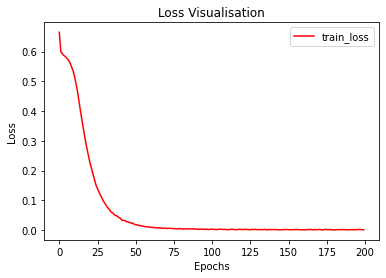

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

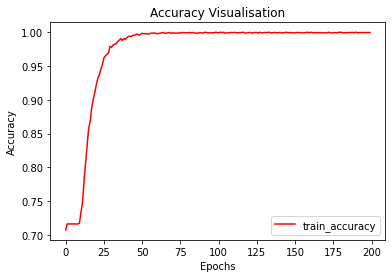

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_HASOC2020_Test_GermEval2019_Task_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

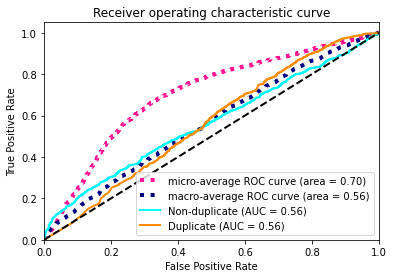

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)